In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the Titanic training data
data = pd.read_csv('../titanic/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Preprocess the data
# Fill missing Age with median
data['Age'].fillna(data['Age'].median(), inplace=True)

# Fill missing Embarked with mode
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Drop columns that are not useful: PassengerId, Name, Ticket, Cabin
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Encode categorical variables
le_sex = LabelEncoder()
data['Sex'] = le_sex.fit_transform(data['Sex'])

le_embarked = LabelEncoder()
data['Embarked'] = le_embarked.fit_transform(data['Embarked'])

# Features and target
X = data.drop('Survived', axis=1)
y = data['Survived']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
data['Embarked']

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int64

In [6]:
# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X, y)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

# Best score
print("Best cross-validation score: ", grid_search.best_score_)

# Evaluate on test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
print("Test set accuracy: ", accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; tot

In [ ]:
# sklearn removed `grid_scores_`; use cv_results_ instead
result_df = pd.DataFrame(grid_search.cv_results_)
grid_mean_scores = result_df['mean_test_score'].values.reshape(len(param_grid['n_estimators']),
                                                                     len(param_grid['max_depth']),
                                                                     len(param_grid['min_samples_split']),
                                                                     len(param_grid['min_samples_leaf']),
                                                                     len(param_grid['bootstrap']))

print("Grid mean scores: ", grid_mean_scores)

Grid mean scores:  [[[[[0.80812253 0.80812253]
    [0.80251083 0.83279769]
    [0.83502605 0.83166154]]

   [[0.83281652 0.82944573]
    [0.82830959 0.82942063]
    [0.83053794 0.82717344]]

   [[0.82832214 0.82943946]
    [0.83056305 0.82495135]
    [0.82830959 0.82717971]]]


  [[[0.8260875  0.82496391]
    [0.82270416 0.8260875 ]
    [0.82496391 0.82270416]]

   [[0.81822233 0.82271672]
    [0.82159312 0.83166154]
    [0.83390245 0.83502605]]

   [[0.82605612 0.83502605]
    [0.83390245 0.82944573]
    [0.83392756 0.82943946]]]


  [[[0.82270416 0.82606239]
    [0.8294269  0.82607495]
    [0.83279141 0.83279141]]

   [[0.82943318 0.82943946]
    [0.83167409 0.82158684]
    [0.8215994  0.82718599]]

   [[0.82158684 0.8215994 ]
    [0.82718599 0.82270416]
    [0.82272299 0.82271044]]]


  [[[0.80699893 0.80923985]
    [0.80475802 0.83279769]
    [0.83502605 0.83166154]]

   [[0.83394012 0.82944573]
    [0.82943318 0.82942063]
    [0.82941435 0.82604984]]

   [[0.82832214 0.82943946]
 

In [9]:
results_df = pd.DataFrame(grid_search.cv_results_)

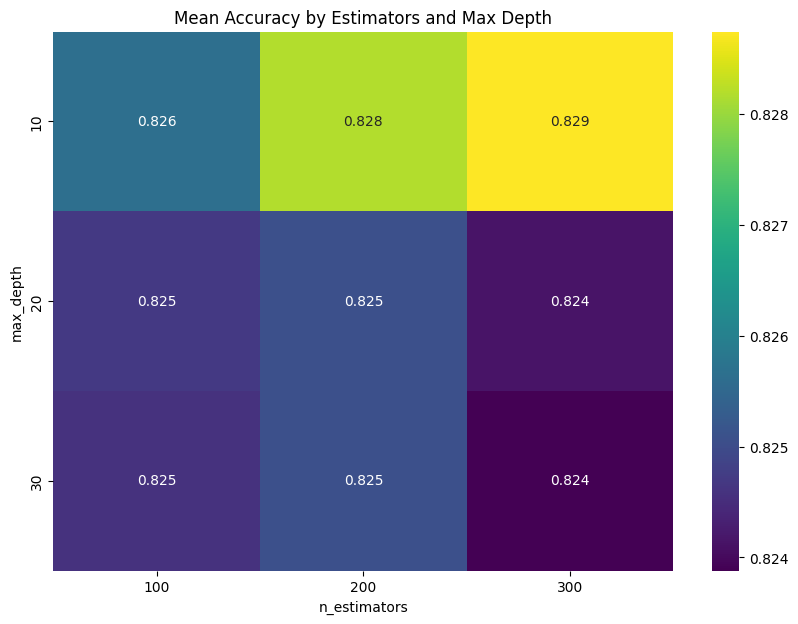

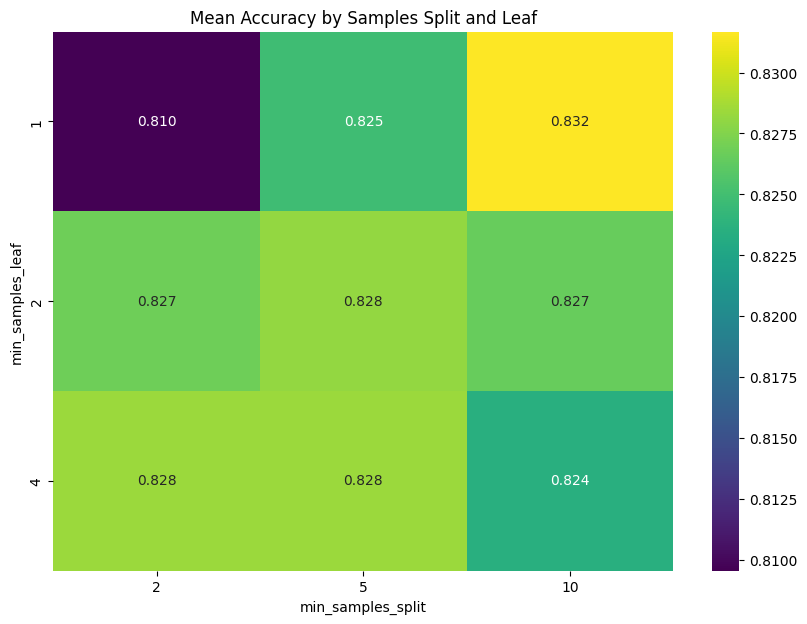

In [13]:
# Function to plot a heatmap for two parameters
def plot_heatmap_2d(results_df, param_x, param_y, title):
    # Pivot the data to get average test score (mean_test_score) for each combination
    # This automatically finds the best of other params if grouped correctly
    pivot_table = results_df.pivot_table(
        values='mean_test_score',
        index=f'param_{param_y}',
        columns=f'param_{param_x}'
    )

    plt.figure(figsize=(10, 7))
    sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap='viridis')
    plt.title(title)
    plt.xlabel(param_x)
    plt.ylabel(param_y)
    plt.show()

# Example 1: Plotting n_estimators vs max_depth
plot_heatmap_2d(results_df, 'n_estimators', 'max_depth', 'Mean Accuracy by Estimators and Max Depth')

# Example 2: Plotting min_samples_split vs min_samples_leaf
plot_heatmap_2d(results_df, 'min_samples_split', 'min_samples_leaf', 'Mean Accuracy by Samples Split and Leaf')
